In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

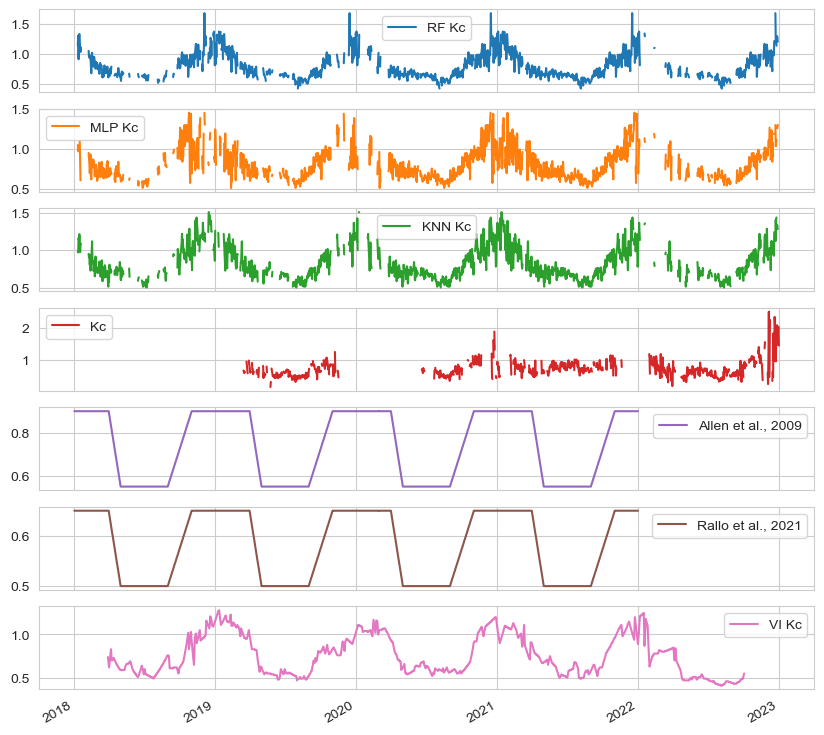

In [2]:
df = pd.read_pickle('../data/predicted/all_models.pickle')
df.plot(subplots=True, figsize=(10, 10))

<AxesSubplot:>

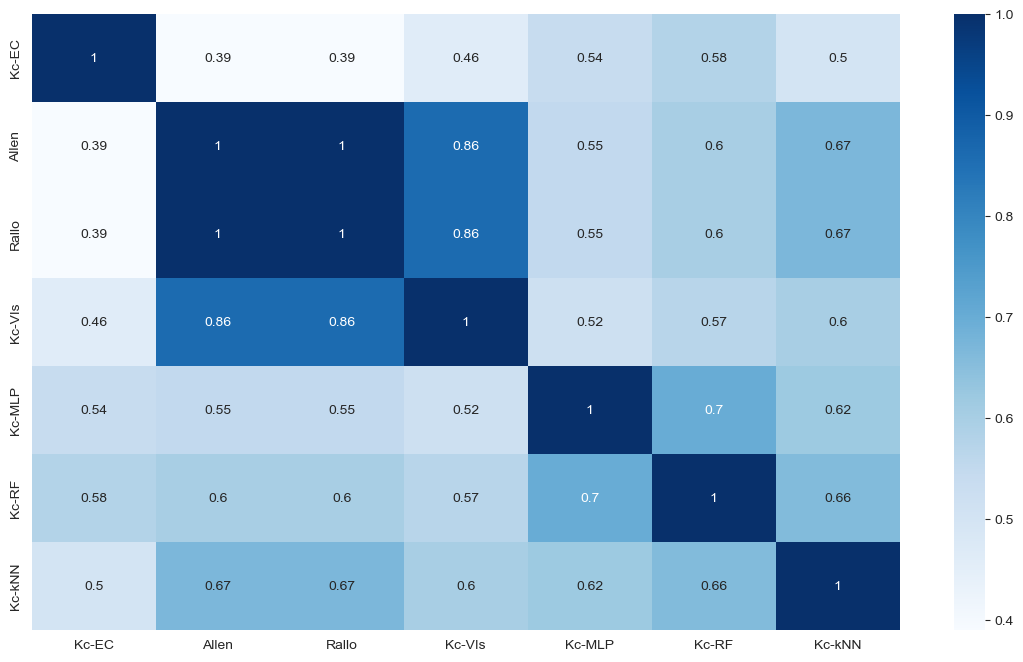

In [21]:
# Set the correlation table from Kc paper data (Fig.8)
correlation_table = [
    [1, 0.39, 0.39, 0.46, 0.54, 0.58, 0.5],
    [0.39, 1, 1, 0.86, 0.55, 0.6, 0.67],
    [0.39, 1, 1, 0.86, 0.55, 0.6, 0.67],
    [0.46, 0.86, 0.86, 1, 0.52, 0.57, 0.6],
    [0.54, 0.55, 0.55, 0.52, 1, 0.7, 0.62],
    [0.58, 0.6, 0.6, 0.57, 0.7, 1, 0.66],
    [0.5, 0.67, 0.67, 0.6, 0.62, 0.66, 1]
]
df_corr = pd.DataFrame(columns=['Kc-EC', 'Allen', 'Rallo', 'Kc-VIs', 'Kc-MLP', 'Kc-RF', 'Kc-kNN'], index=['Kc-EC', 'Allen', 'Rallo', 'Kc-VIs', 'Kc-MLP', 'Kc-RF', 'Kc-kNN'], data=correlation_table)

# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True, cmap="Blues", fmt='.2g')

In [285]:
def polar_plot(categories, values, ax=None, **kwargs):
    if ax is None:    
        # Set up the figure in polar coordinates
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    radiants = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    angles = np.degrees(radiants)
    
    # Add the start point to the end of your data to close the plot
    values = np.append(values, values[0])
    radiants = np.append(radiants, radiants[0])
    
    # Set the categories labels
    ax.set_thetagrids(angles, labels=categories, fontsize=18)
     
    # Plot actual sales graph
    ax.plot(radiants, values, 'b.-')
    ax.fill(radiants, values, 'b', alpha=0.1)
    
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])
    # Minor ticks
    for radius in [0.5, 0.7, 0.9]:
        ax.plot(np.linspace(0, 2*np.pi, 100), [radius] * 100, 
                linestyle=(0, (10, 10)), lw=0.5, color='grey', alpha=0.5)
        
    ax.set_title(kwargs.get('title', '') + '\n', fontsize=18, weight='bold')
    
    ax.set_rmax(1)
    ax.set_rmin(0)
    
    if kwargs.get('annotate', False):
        for i, v in enumerate(values):
            ax.annotate(f'{v:.2f}', xy=(radiants[i], values[i]), 
                        xytext=(radiants[i], values[i] - 0.15), 
                        ha='center', va='center', color='b', fontsize=14)
    
    return ax


def polar_grid(df_corr, **kwargs):
    fig = plt.figure(figsize=kwargs.get('figsize',(20, 10)))
    
    layout = kwargs.get('layout', [3, 2])
    rows = layout[0]
    cols = layout[1]
    gs = GridSpec(rows, cols, figure=fig)  # 3 rows, 2 columns
    
    for i, (model, correlations) in enumerate(df_corr.items()):
        i = i+1
        if kwargs.get('centered', False):
            col_lim = cols / 2
            r = int(i // col_lim)
            if i < col_lim:
                # print(f"{i}: gs[{r}, {i % cols + i - 1}: {i % cols + i - 1 + 2}]")
                # The first row is the one shifted
                c_left = i % cols + i - 1
                c_right = i % cols + i + 2 - 1
                grid_position = gs[r, c_left: c_right]
            else:
                # print(f"{i}:: gs[{r}, {i % cols + i - cols}: {i % cols + i - cols + 2}]")
                # Those are full rows
                c_left = i % cols + i - cols
                c_right = i % cols + i - cols + 2
                grid_position = gs[r, c_left: c_right]
                # print(f"{i}")
        else:
            # print(f"{i}: gs[{(i - 1) // cols}, {i % cols}]")
            grid_position = gs[(i - 1) // cols, i % cols]
        # print(f"row  col")
        ax = fig.add_subplot(grid_position, polar=True)
        correlations.drop(model, inplace=True)
        polar_plot(correlations.index, correlations.values, ax=ax, title=model, **kwargs)
    
    plt.tight_layout(h_pad=4, pad=2)
    plt.show()
    return fig

In [291]:
df_to_plot = df_corr.loc[:,['Kc-MLP', 'Kc-RF', 'Kc-kNN', 'Kc-VIs']]

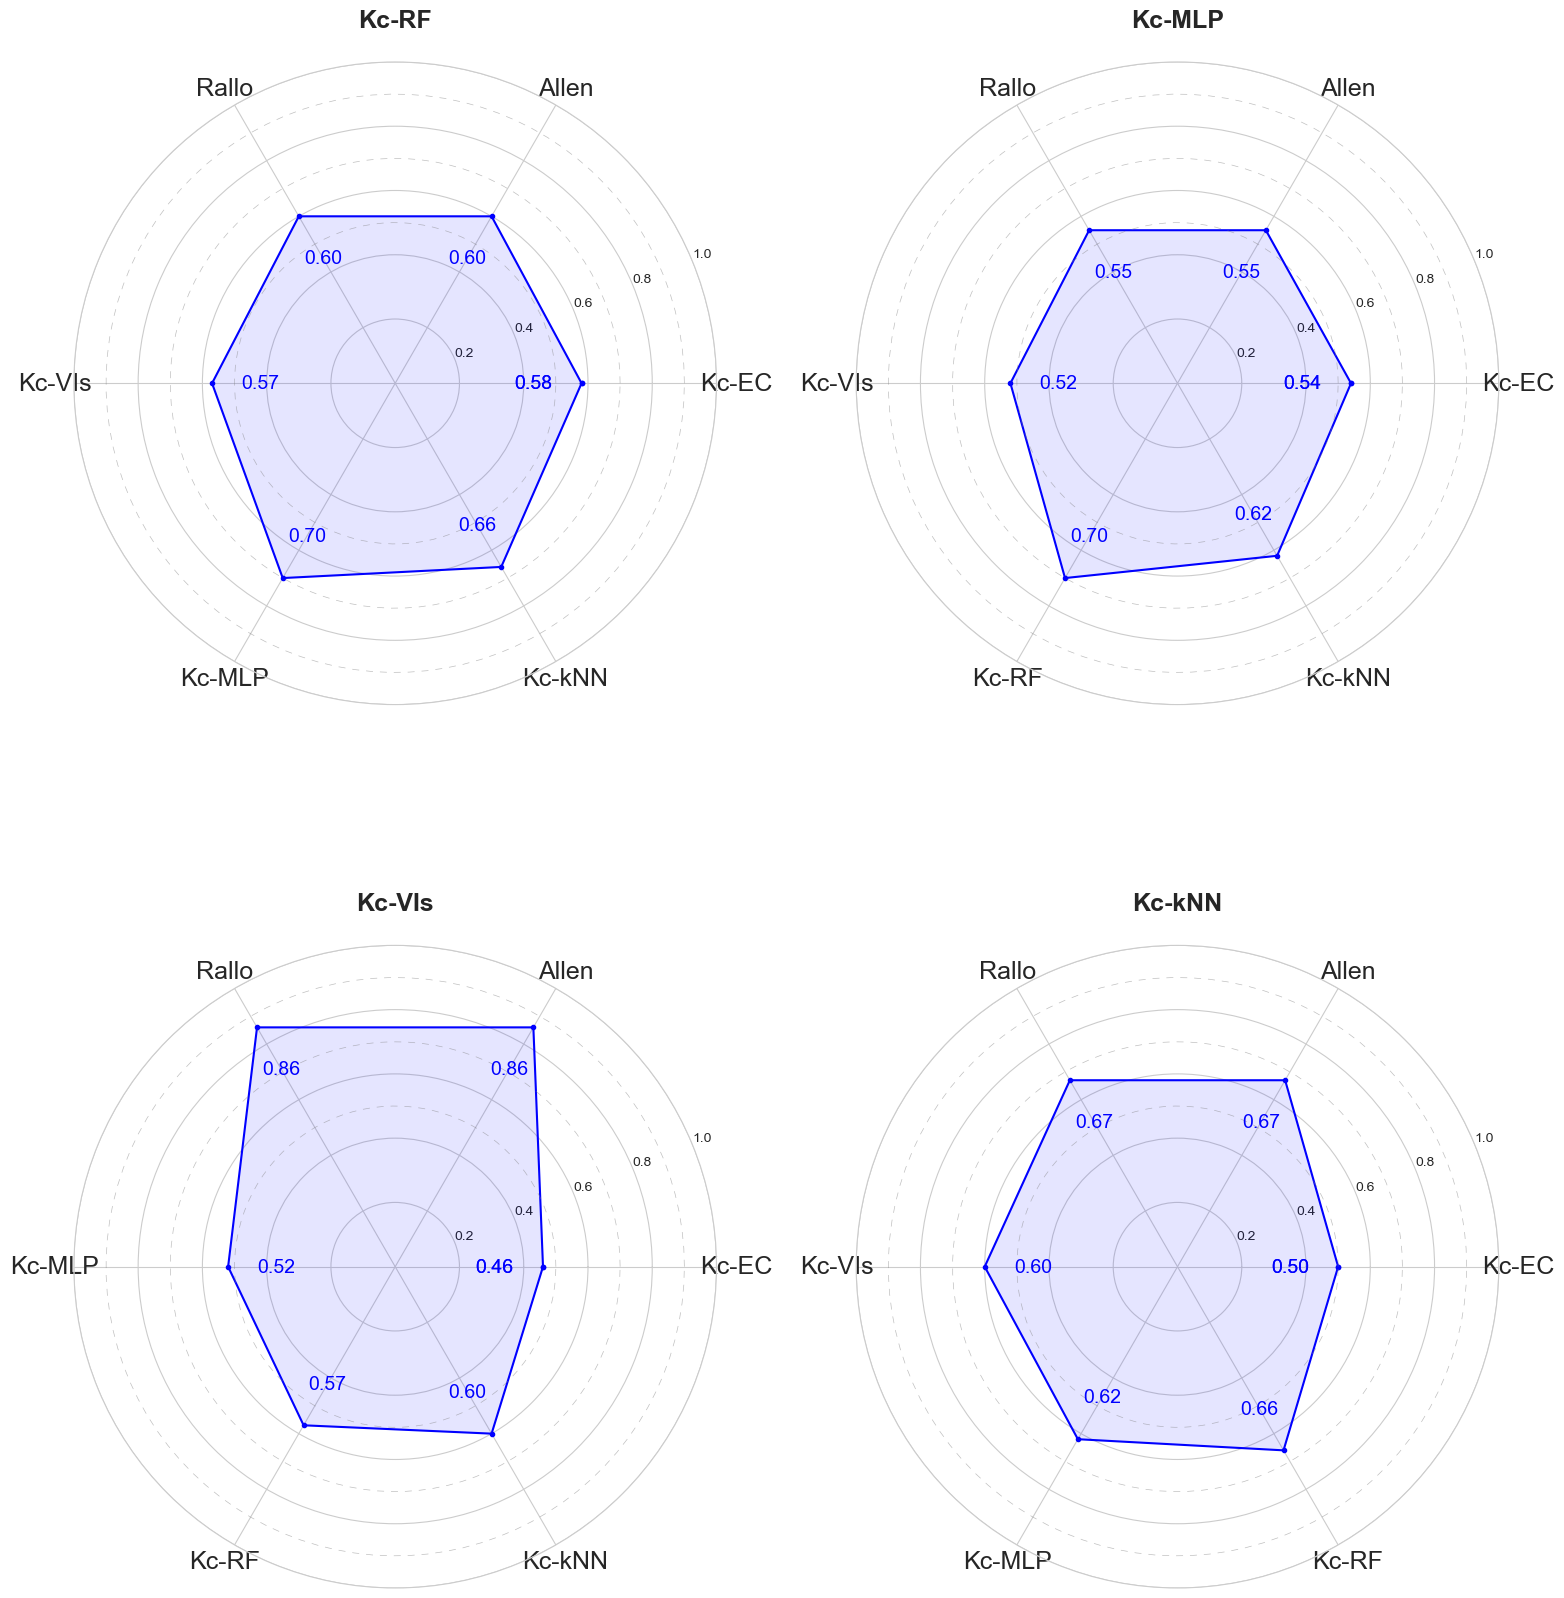

In [294]:
grid_vertical = polar_grid(df_to_plot, figsize=(16, 18), layout=[2, 2], annotate=True, centered=False)

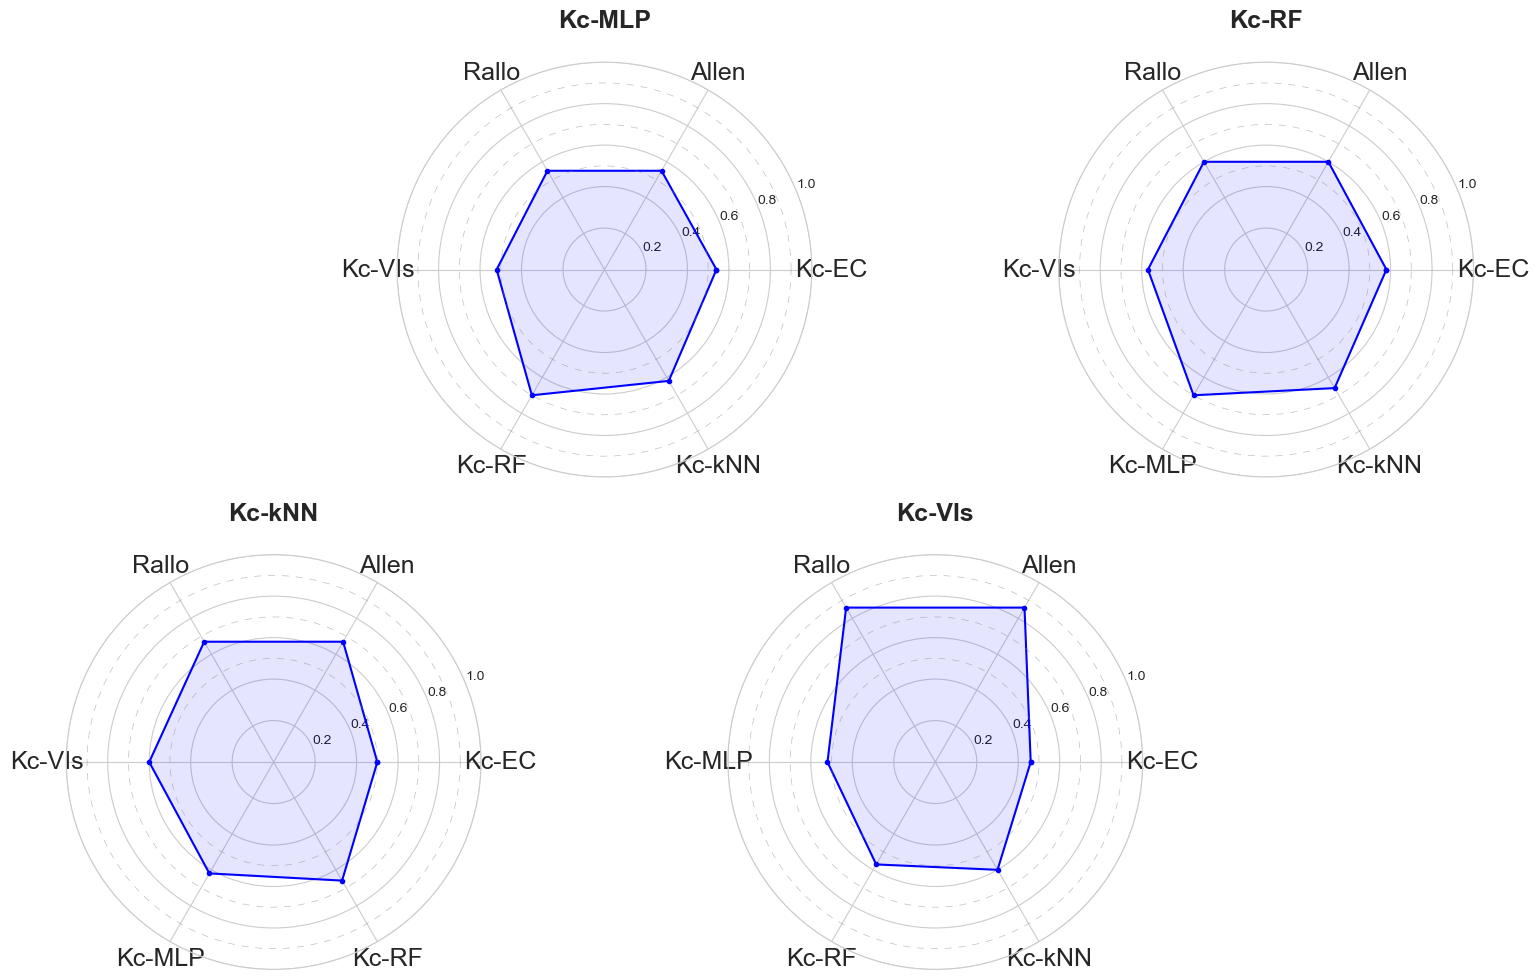

In [259]:
grid_unannotated = polar_grid(df_to_plot, layout=[2, 6], centered='columns')

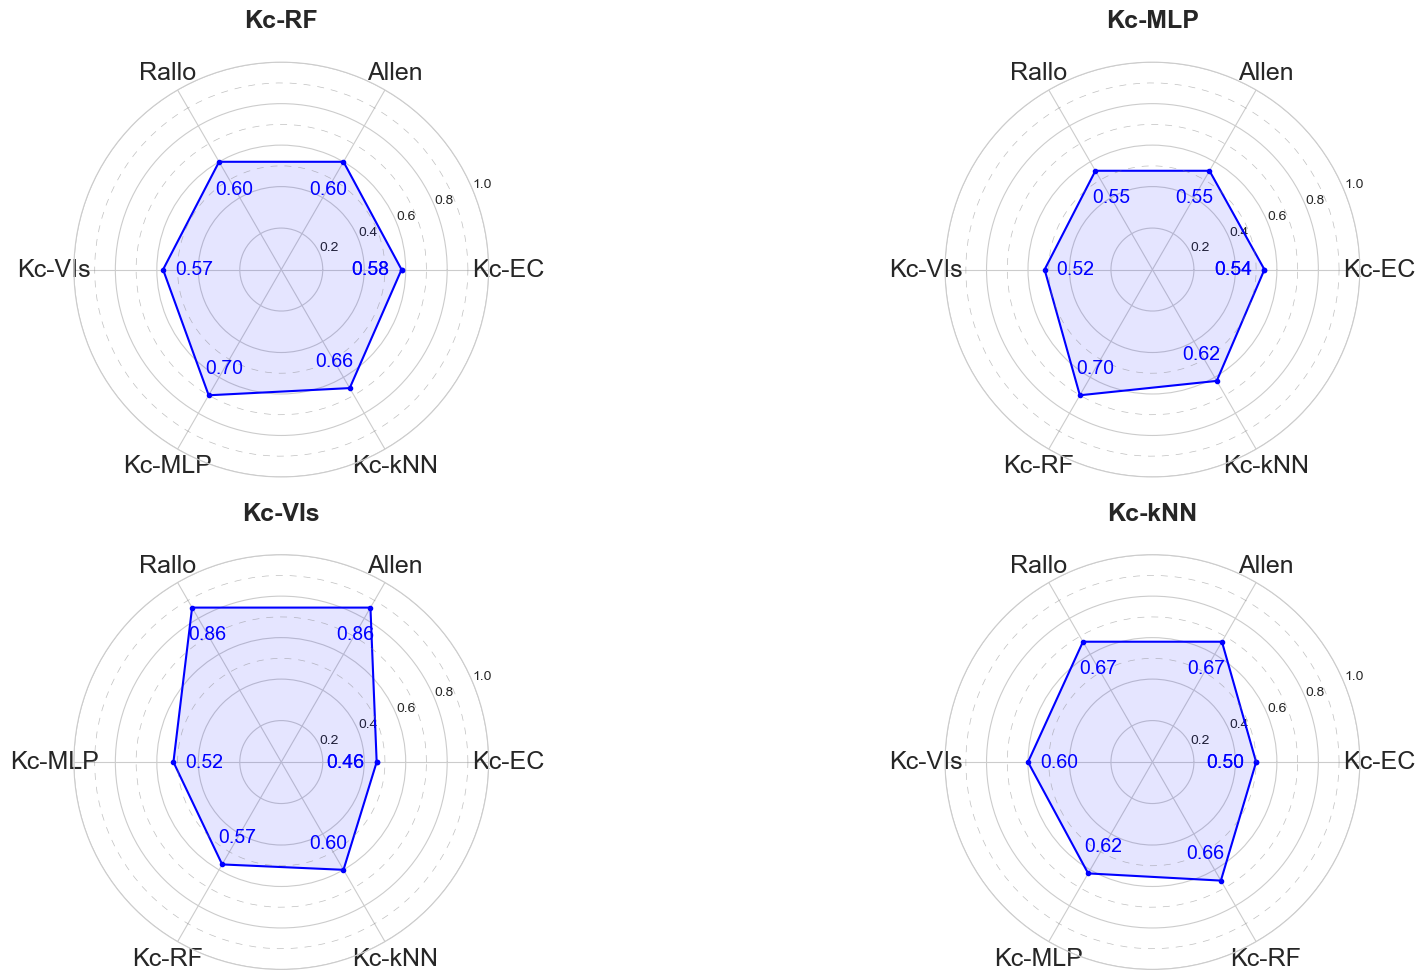

In [260]:
grid_annotated = polar_grid(df_to_plot, annotate=True, centered='columns', layout=[2, 6])

In [295]:
grid_vertical.savefig('../visualization/paper/pearson_radial_scores.pdf', dpi=300)
# grid_annotated.savefig('../visualization/paper/pearson_radial_scores_horizontal_EC.pdf', dpi=300)

In [9]:
scores_dict = {
    'MLP-EC': [0.15, 0.01, 0.12,0.25,0.54,0.28],
    'MLP-VIs': [0.16,0.03,0.13,5.34,0.52,0.22],
    'MLP-Allen': [0.14,0.02,0.10,3.07,0.55,0.24],
    'MLP-Rallo': [0.17,0.14,0.14,25.69,0.55,-6.04],
    'RF-EC': [0.15,-0.01,0.11,5.06,0.58,0.37],
    'RF-VIs': [0.16,0.03,0.13,4.51,0.57,0.30],
    'RF-Allen': [0.13,0.01,0.10,2.25,0.60,0.33],
    'RF-Rallo': [0.17,0.14,0.14,24.72,0.60,-5.44],
    'kNN-EC': [0.17,0.03,0.13,5.06,0.50,0.17],
    'kNN-VIs': [0.16,0.07,0.13,10.41,0.60,0.22],
    'kNN-Allen': [0.14,0.05,0.10,8.10,0.67,0.28],
    'kNN-Rallo': [0.20,0.18,0.18,31.86,0.67,-8.92],
}